ATTENTION MECHANISM: COMPLETE STEP-BY-STEP TUTORIAL
This tutorial demonstrates scaled dot-product attention with visualizations

STEP 1: Input Embeddings
We start with 3 tokens, each represented by a 4-dimensional embedding vector

Input Matrix Shape: (3, 4) (Tokens × Embedding Dimension)
Input Embedding Matrix:
[[1.2 0.8 0.5 1. ]
 [0.9 1.1 0.7 0.6]
 [0.3 0.5 1.3 0.9]]

STEP 2: Query (Q), Key (K), Value (V) Generation
Project input embeddings to d_k dimension using linear transformations

Weight Matrix Shape: 4×2 (d_model × d_k)
Q Matrix Shape: (3, 2), Values:
[[0.2576 0.1703]
 [0.1943 0.1847]
 [0.159  0.1106]]

K Matrix Shape: (3, 2), Values:
[[-0.2538 -0.124 ]
 [-0.1798 -0.1701]
 [-0.161  -0.3063]]

V Matrix Shape: (3, 2), Values:
[[-0.1141 -0.229 ]
 [-0.0844 -0.2284]
 [ 0.1208 -0.2188]]


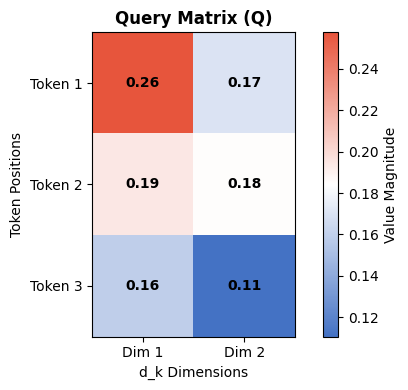

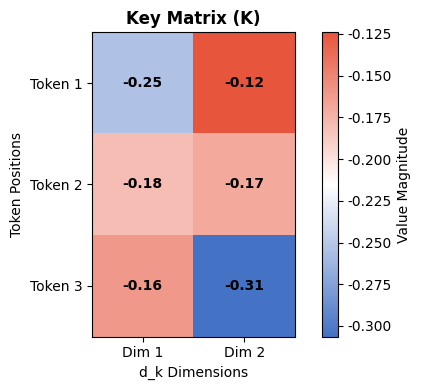

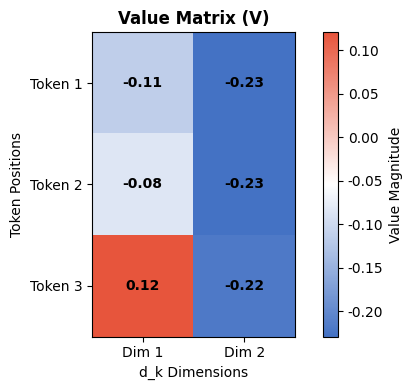


STEP 3: Attention Scores Calculation (Q × Kᵀ)
Dot product between Q and Kᵀ measures token similarity

K Transpose Shape: (2, 3)
Attention Scores Shape: (3, 3) (Query Tokens × Key Tokens)
Attention Scores (Higher = More Similar):
[[-0.0865 -0.0753 -0.0937]
 [-0.0722 -0.0664 -0.0879]
 [-0.0541 -0.0474 -0.0595]]


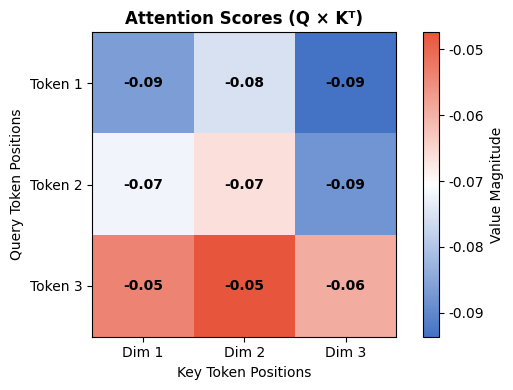


STEP 4: Scaling by √d_k
Scale scores to avoid softmax saturation (1/√2 ≈ 0.7071)

Scaled Attention Scores:
[[-0.0612 -0.0532 -0.0662]
 [-0.0511 -0.0469 -0.0621]
 [-0.0382 -0.0335 -0.0421]]


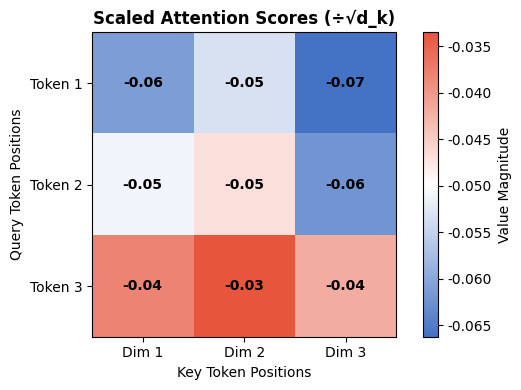


STEP 5: Softmax Normalization
Convert scores to probability weights (each row sums to 1)

Attention Weights (Probability Distribution):
[[0.333  0.3357 0.3313]
 [0.3341 0.3355 0.3304]
 [0.3332 0.3348 0.332 ]]
Row Sum Verification: [1. 1. 1.]


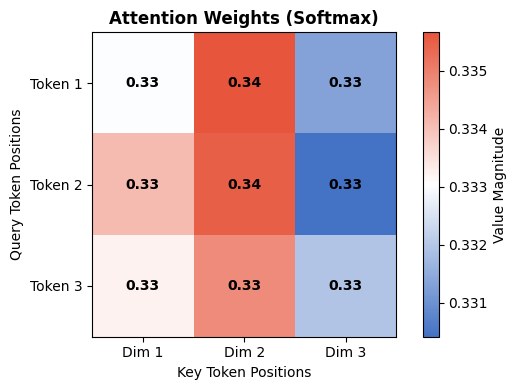


STEP 6: Weighted Sum with Value Matrix
Compute contextual embeddings by weighting V with attention weights

V Matrix Shape: (3, 2), Weights Shape: (3, 3)
Attention Output Shape: (3, 2) (Tokens × d_k)
Final Contextual Embeddings:
[[-0.0263 -0.2254]
 [-0.0265 -0.2254]
 [-0.0262 -0.2254]]


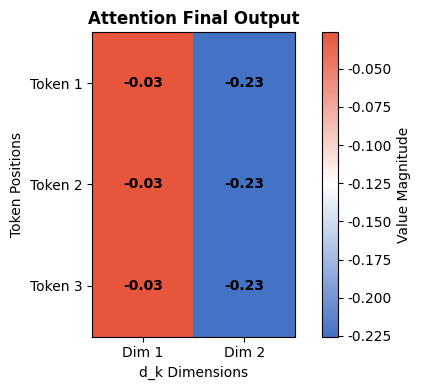


STEP 7: Integrated Scaled Dot-Product Attention Function
Function Output Matches Step-by-Step Calculation: True

STEP 8: Tutorial Summary
Key Takeaways:
1. Attention lets each token attend to all other tokens in the sequence
2. Q=What to look for, K=What's available, V=What to retrieve
3. Scaling prevents softmax saturation and gradient vanishing
4. Output embeddings are contextual (contain cross-token information)

Transformation: Input ((3, 4)) → Output ((3, 2))

Generating Attention Computation Flow Diagram...


AttributeError: Rectangle.set() got an unexpected keyword argument 'boxstyle'

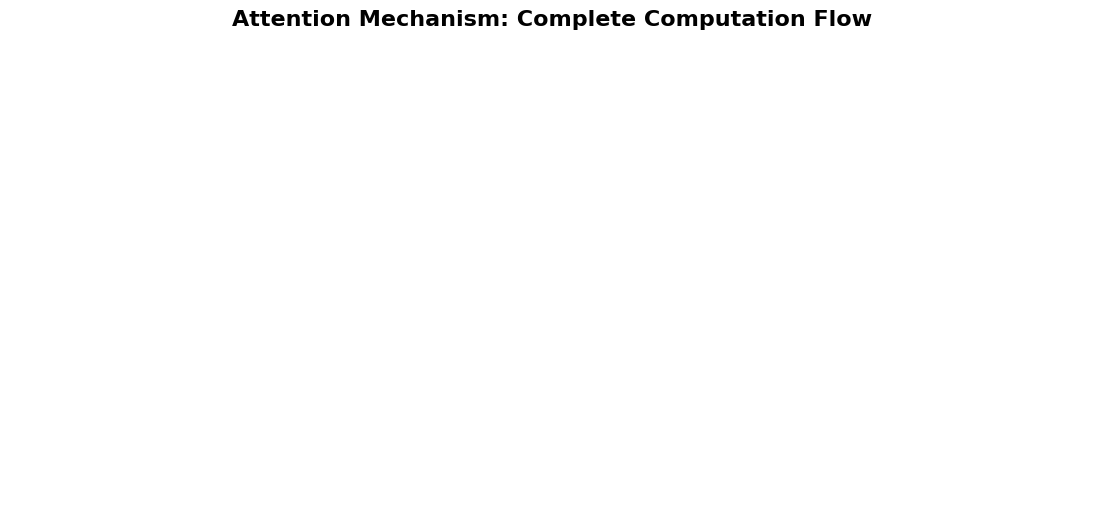

In [4]:
# -------------------------- Step 1: Global Configuration --------------------------
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

# Global plot style configuration
plt.style.use('default')
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False  # Fix minus sign display

# -------------------------- Teaching Tools: Visualization Functions --------------------------
def plot_attention_flow():
    """Visualize the complete Attention computation process (QKV → Scores → Scaling → Softmax → Output)"""
    plt.figure(figsize=(14, 6))
    plt.axis('off')
    plt.title('Attention Mechanism: Complete Computation Flow', fontsize=16, fontweight='bold')

    # Define process nodes with positions
    nodes = [
        ('Input Sequence\n(3 Tokens, Dim=4)', (0, 0.5)),
        ('Q/K/V Generation\n(Linear Transform)', (2, 0.5)),
        ('Similarity Scores\n(Q × Kᵀ)', (4, 0.7)),
        ('Scaling\n(÷ √dₖ)', (4, 0.5)),
        ('Softmax\n(Normalize Weights)', (4, 0.3)),
        ('Weighted Sum\n(Weights × V)', (6, 0.5)),
        ('Attention Output\n(Contextual Embeddings)', (8, 0.5))
    ]

    # Draw nodes
    colors = ['#E8F4FD', '#D1E7DD', '#FFF3CD', '#F8D7DA', '#E2E3E5', '#D1ECF1', '#FFEAA7']
    for (text, pos), color in zip(nodes, colors):
        rect = patches.Rectangle((pos[0]-0.5, pos[1]-0.15), 1.0, 0.3,
                                 facecolor=color, edgecolor='black', linewidth=1.5,
                                 alpha=0.9, boxstyle='round,pad=0.05')
        plt.gca().add_patch(rect)
        plt.text(pos[0], pos[1], text, ha='center', va='center', fontsize=10, fontweight='bold')

    # Draw connecting arrows
    arrows = [
        ((0.7, 0.5), (1.3, 0.5)),  # Input → QKV
        ((2.7, 0.5), (3.3, 0.7)),  # QKV → Scores
        ((4, 0.65), (4, 0.55)),    # Scores → Scaling
        ((4, 0.45), (4, 0.35)),    # Scaling → Softmax
        ((4.7, 0.3), (5.3, 0.5)),  # Softmax → Weighted Sum
        ((6.7, 0.5), (7.3, 0.5))   # Weighted Sum → Output
    ]
    for (start, end) in arrows:
        plt.arrow(start[0], start[1], end[0]-start[0], end[1]-start[1],
                  head_width=0.03, head_length=0.05, fc='black', ec='black', linewidth=1.5)

    plt.tight_layout()
    plt.show()

def plot_matrix_heatmap(matrix, title, xlabel, ylabel, figsize=(6, 4)):
    """Create educational heatmap for matrix visualization"""
    plt.figure(figsize=figsize)
    # Custom colormap (blue → white → red)
    cmap = LinearSegmentedColormap.from_list('custom', ['#4472C4', '#FFFFFF', '#E7553C'])
    im = plt.imshow(matrix, cmap=cmap, vmin=np.min(matrix), vmax=np.max(matrix))

    # Add value annotations
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            color = 'black' if abs(matrix[i, j]) < 0.5 else 'white'
            plt.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center',
                   color=color, fontsize=10, fontweight='bold')

    # Colorbar configuration
    cbar = plt.colorbar(im, label='Value Magnitude')
    cbar.set_label('Value Magnitude', fontsize=10)

    # Titles and labels
    plt.title(title, fontsize=12, fontweight='bold')
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.xticks(range(matrix.shape[1]), [f'Dim {x+1}' for x in range(matrix.shape[1])])
    plt.yticks(range(matrix.shape[0]), [f'Token {y+1}' for y in range(matrix.shape[0])])
    plt.tight_layout()
    plt.show()

def print_step_header(step_number, title):
    """Print formatted step headers for readability"""
    print("\n" + "="*70)
    print(f"STEP {step_number}: {title}")
    print("="*70)

# -------------------------- CORE TEACHING LOGIC --------------------------
print("ATTENTION MECHANISM: COMPLETE STEP-BY-STEP TUTORIAL")
print("This tutorial demonstrates scaled dot-product attention with visualizations")

# Step 1: Input Embeddings
print_step_header(1, "Input Embeddings")
print("We start with 3 tokens, each represented by a 4-dimensional embedding vector")
input_embedding = np.array([
    [1.2, 0.8, 0.5, 1.0],  # Token 1 embedding
    [0.9, 1.1, 0.7, 0.6],  # Token 2 embedding
    [0.3, 0.5, 1.3, 0.9]   # Token 3 embedding
])
print(f"\nInput Matrix Shape: {input_embedding.shape} (Tokens × Embedding Dimension)")
print("Input Embedding Matrix:")
print(input_embedding.round(2))

# Step 2: Generate Q, K, V Matrices
print_step_header(2, "Query (Q), Key (K), Value (V) Generation")
print("Project input embeddings to d_k dimension using linear transformations")
d_model = 4  # Input embedding dimension
d_k = 2      # Target dimension for Q/K/V (64 in standard Transformer)
np.random.seed(42)  # Reproducible results
W_Q = np.random.randn(d_model, d_k) * 0.1
W_K = np.random.randn(d_model, d_k) * 0.1
W_V = np.random.randn(d_model, d_k) * 0.1

# Linear transformations: Input × Weight Matrix
Q = np.dot(input_embedding, W_Q)
K = np.dot(input_embedding, W_K)
V = np.dot(input_embedding, W_V)

print(f"\nWeight Matrix Shape: {d_model}×{d_k} (d_model × d_k)")
print(f"Q Matrix Shape: {Q.shape}, Values:")
print(Q.round(4))
print(f"\nK Matrix Shape: {K.shape}, Values:")
print(K.round(4))
print(f"\nV Matrix Shape: {V.shape}, Values:")
print(V.round(4))

# Visualize Q/K/V
plot_matrix_heatmap(Q, "Query Matrix (Q)", "d_k Dimensions", "Token Positions")
plot_matrix_heatmap(K, "Key Matrix (K)", "d_k Dimensions", "Token Positions")
plot_matrix_heatmap(V, "Value Matrix (V)", "d_k Dimensions", "Token Positions")

# Step 3: Compute Attention Scores
print_step_header(3, "Attention Scores Calculation (Q × Kᵀ)")
print("Dot product between Q and Kᵀ measures token similarity")
K_transpose = K.T
attention_score = np.dot(Q, K_transpose)
print(f"\nK Transpose Shape: {K_transpose.shape}")
print(f"Attention Scores Shape: {attention_score.shape} (Query Tokens × Key Tokens)")
print("Attention Scores (Higher = More Similar):")
print(attention_score.round(4))

plot_matrix_heatmap(attention_score, "Attention Scores (Q × Kᵀ)",
                   "Key Token Positions", "Query Token Positions")

# Step 4: Scaling
print_step_header(4, "Scaling by √d_k")
print(f"Scale scores to avoid softmax saturation (1/√{d_k} ≈ {1/np.sqrt(d_k):.4f})")
scaled_score = attention_score / np.sqrt(d_k)
print(f"\nScaled Attention Scores:")
print(scaled_score.round(4))

plot_matrix_heatmap(scaled_score, "Scaled Attention Scores (÷√d_k)",
                   "Key Token Positions", "Query Token Positions")

# Step 5: Softmax Normalization
print_step_header(5, "Softmax Normalization")
print("Convert scores to probability weights (each row sums to 1)")
def softmax(x):
    """Numerically stable softmax implementation"""
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

attention_weights = softmax(scaled_score)
print(f"\nAttention Weights (Probability Distribution):")
print(attention_weights.round(4))
print(f"Row Sum Verification: {np.sum(attention_weights, axis=1).round(4)}")

plot_matrix_heatmap(attention_weights, "Attention Weights (Softmax)",
                   "Key Token Positions", "Query Token Positions")

# Step 6: Weighted Sum (Attention Output)
print_step_header(6, "Weighted Sum with Value Matrix")
print("Compute contextual embeddings by weighting V with attention weights")
attention_output = np.dot(attention_weights, V)
print(f"\nV Matrix Shape: {V.shape}, Weights Shape: {attention_weights.shape}")
print(f"Attention Output Shape: {attention_output.shape} (Tokens × d_k)")
print("Final Contextual Embeddings:")
print(attention_output.round(4))

plot_matrix_heatmap(attention_output, "Attention Final Output",
                   "d_k Dimensions", "Token Positions")

# Step 7: Integrated Attention Function
print_step_header(7, "Integrated Scaled Dot-Product Attention Function")
def scaled_dot_product_attention(Q, K, V):
    """Complete attention implementation as in Transformer"""
    d_k = Q.shape[-1]
    scores = np.dot(Q, K.T) / np.sqrt(d_k)
    weights = softmax(scores)
    output = np.dot(weights, V)
    return output, weights

# Validation
final_output, final_weights = scaled_dot_product_attention(Q, K, V)
print("Function Output Matches Step-by-Step Calculation:",
      np.allclose(final_output, attention_output, atol=1e-6))

# Step 8: Summary
print_step_header(8, "Tutorial Summary")
print("Key Takeaways:")
print("1. Attention lets each token attend to all other tokens in the sequence")
print("2. Q=What to look for, K=What's available, V=What to retrieve")
print("3. Scaling prevents softmax saturation and gradient vanishing")
print("4. Output embeddings are contextual (contain cross-token information)")
print(f"\nTransformation: Input ({input_embedding.shape}) → Output ({attention_output.shape})")

# Plot complete flow diagram
print("\nGenerating Attention Computation Flow Diagram...")
plot_attention_flow()

print("\n" + "="*70)
print("ATTENTION MECHANISM TUTORIAL COMPLETED SUCCESSFULLY!")
print("="*70)